In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy as state
import seaborn as sns
import os
os.getcwd ()

'C:\\Users\\marwa\\PycharmProjects\\pythonProject3'

In [2]:
df = pd.read_csv('House.csv', encoding='latin-1')
df.head(3)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
df = df.copy()
df['price_per_sqm'] = df['price'] / df['sq']
df['sqm_per_room'] = df['sq'] / df['rooms']
df.head(3)

,address,city,floor,id,latitude,longitude,price,rooms,sq,year,price_per_sqm,sqm_per_room
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,24.683333
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,9866.611977,24.380000
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,18.500000


In [7]:
df['price'].describe()

count    2.376400e+04
mean     6.493536e+05
std      5.326970e+05
min      5.000000e+03
25%      4.115461e+05
50%      5.200000e+05
75%      6.999990e+05
max      1.500000e+07
Name: price, dtype: float64

In [8]:
df.corr()

,floor,id,latitude,longitude,price,rooms,sq,year,price_per_sqm,sqm_per_room
floor,1.000000,-0.023852,0.082347,0.130120,0.123427,-0.000096,-0.002142,-0.012815,0.188052,-0.002208
id,-0.023852,1.000000,-0.860350,0.412519,0.013005,-0.009318,0.004767,0.032489,0.088544,0.004707
latitude,0.082347,-0.860350,1.000000,-0.117007,0.070825,0.017425,-0.007114,-0.051990,0.046181,-0.007007
longitude,0.130120,0.412519,-0.117007,1.000000,0.196294,-0.009377,0.000230,-0.049675,0.369958,0.000291
price,0.123427,0.013005,0.070825,0.196294,1.000000,0.454321,0.007509,-0.009934,0.618967,0.006246
rooms,-0.000096,-0.009318,0.017425,-0.009377,0.454321,1.000000,0.018898,0.038226,-0.111402,0.014456
sq,-0.002142,0.004767,-0.007114,0.000230,0.007509,0.018898,1.000000,0.002709,-0.018079,0.999895
year,-0.012815,0.032489,-0.051990,-0.049675,-0.009934,0.038226,0.002709,1.000000,-0.049314,0.002540
price_per_sqm,0.188052,0.088544,0.046181,0.369958,0.618967,-0.111402,-0.018079,-0.049314,1.000000,-0.017616
sqm_per_room,-0.002208,0.004707,-0.007007,0.000291,0.006246,0.014456,0.999895,0.002540,-0.017616,1.000000


<IPython.core.display.Javascript object>


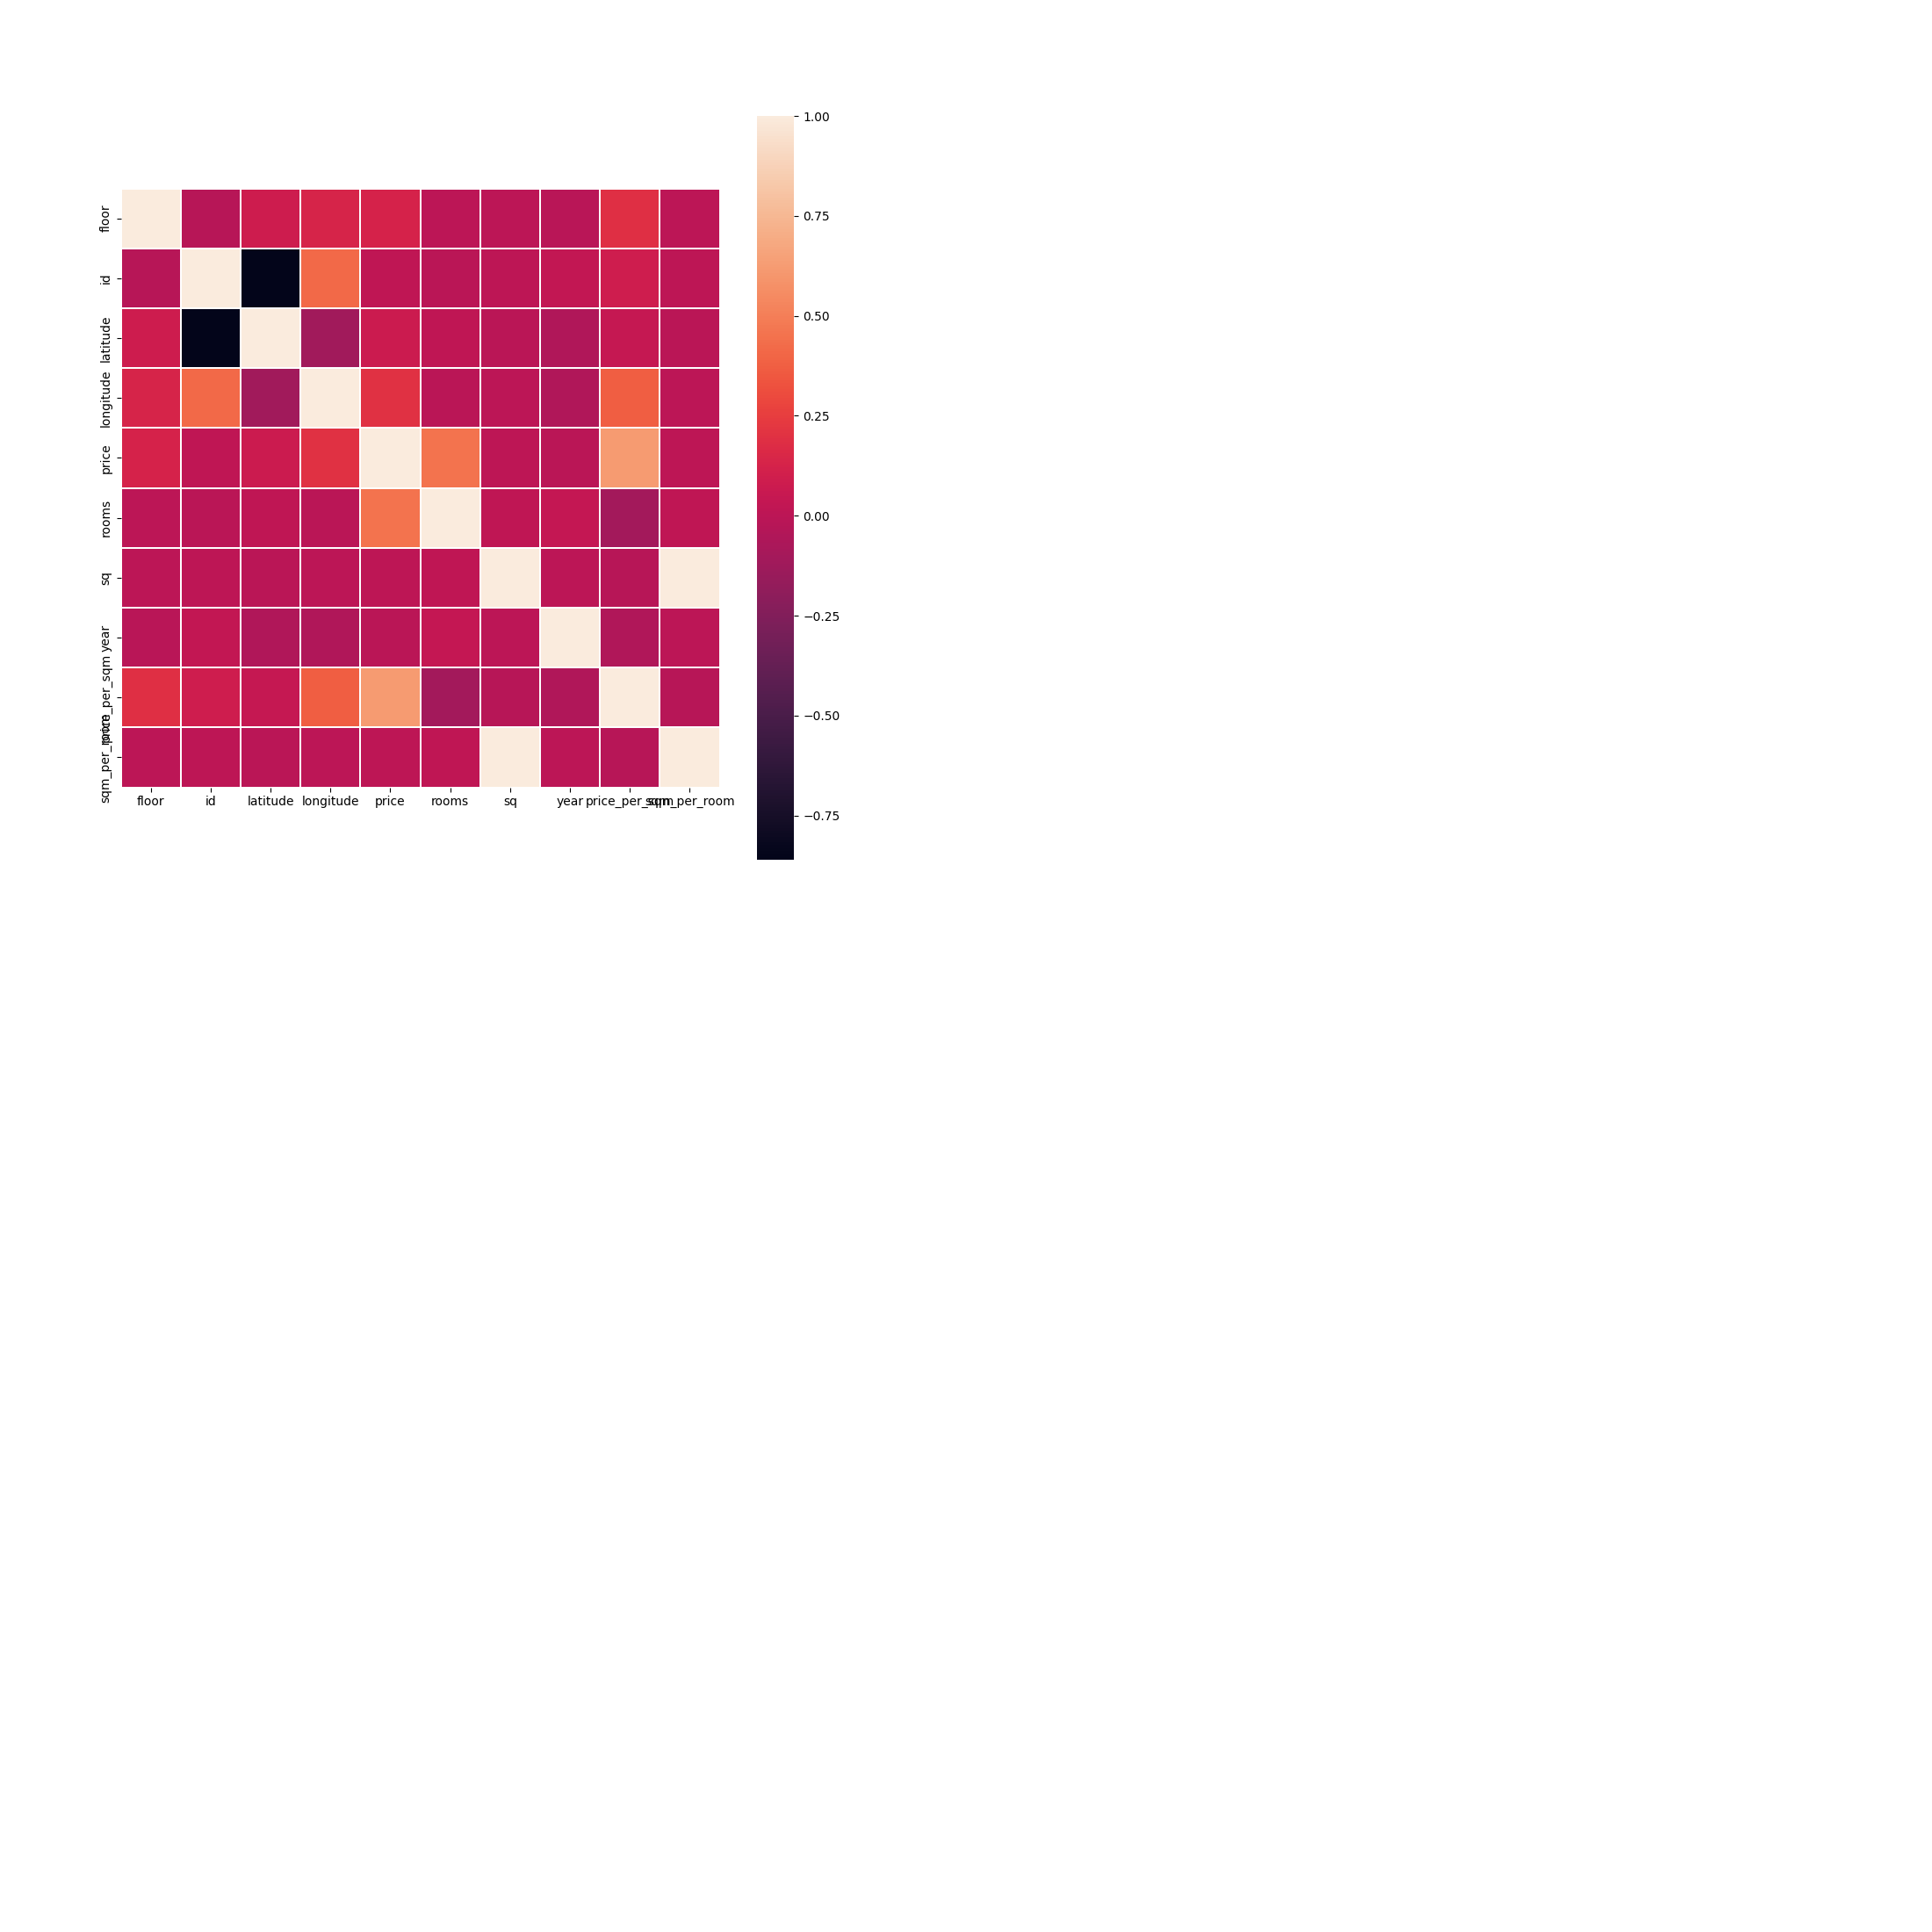

<AxesSubplot:>

In [9]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

In [10]:
# Price
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price'], data=df, ax=ax[1])
fig.show()

<IPython.core.display.Javascript object>

In [ ]:
# Square meters
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sq'], data=df, ax=ax[1])
fig.show()

<IPython.core.display.Javascript object>

In [ ]:
# Price per square meter
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Rooms
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['rooms'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['rooms'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Square meters per room
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[1])
fig.show()

In [ ]:
 #Year
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['year'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['floor'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Square meters
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sq'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Price per square meter
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Rooms
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['rooms'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['rooms'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Square meters per room
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[1])
fig.show()

In [ ]:
 #Year
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['year'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['floor'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Price per square meter
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Rooms
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['rooms'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['rooms'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Square meters per room
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[1])
fig.show()

In [ ]:
 #Year
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['year'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['floor'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Price per square meter
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Rooms
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['rooms'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['rooms'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Square meters per room
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[1])
fig.show()

In [ ]:
 #Year
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['year'], data=df, ax=ax[1])
fig.show()

In [ ]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['floor'], data=df, ax=ax[1])
fig.show()

In [ ]:
# deals with outliers 
# Remove extreme outliers
out_sq = df.loc[df['sq'] > 8000].index.tolist()
df.drop(out_sq, axis=0, inplace=True)
# In case of the year some higher values doesn't make sense and I'll limit the house age to around 300 years (we only have two older houses)
out_years = df.loc[(df['year'] > 2030) | (df['year'] < 1700)].index.tolist()
df.drop(out_years, axis=0, inplace=True)

out_price_per_sqm = df.loc[df['price_per_sqm'] > 90000].index.tolist()
df.drop(out_price_per_sqm, axis=0, inplace=True)


In [ ]:
# Plot the results
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0,0])
sns.boxplot(x=df['sq'], data=df, ax=ax[0,1])
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[1,0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1,1])
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[2,0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[2,1])
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[3,0])
sns.boxplot(x=df['year'], data=df, ax=ax[3,1])
fig.tight_layout()
fig.show()


In [ ]:
def city_name(row):
    if row == 'Poznañ':
        return 'Poznan'
    elif row == 'Kraków':
        return 'Krakow'
    else:
        return 'Warszawa'

df['city'] = df['city'].apply(lambda x: city_name(x))

In [ ]:
plt.figure(figsize=(12,6))
plt.title("House area in square meters vs price")
sns.scatterplot(x='sq', y='price', data=df, hue='city', hue_order = ['Warszawa', 'Krakow', 'Poznan'])
plt.show()
